# Whole dataset QC + visualisation

In [1]:
import glob
import pandas as pd
import scanpy as sc
import scanpy.external as sce

In [2]:
# modify settings to improve performance on the large dataset 

# tell scanpy to do parallel processing with 6 cores
sc._settings.ScanpyConfig.n_jobs=6
# use .png backend for the plots where possible, will make the plots much smaller in file size vs if they are vectorised
sc._settings.settings._vector_friendly=True

In [3]:
adata_240 = sc.read('/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/scanpy/output/integrated_objects/240_libraries_concatenated_gene_info.h5ad')

## QC plots for the whole dataset
Note that these data have already been filtered in this script: `tenk10k_phase1/Scanpy/add_metadata_per_sample_no_norm.py`

### Violin plot

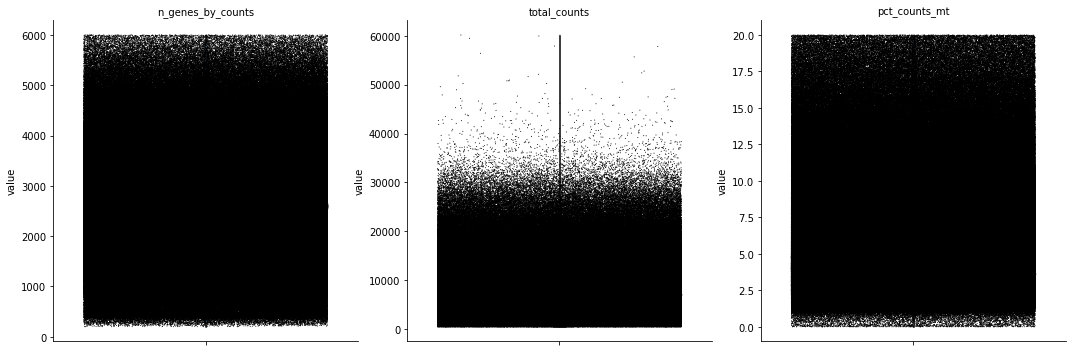

In [4]:
sc.pl.violin(
    adata_240,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

### Scatter plots

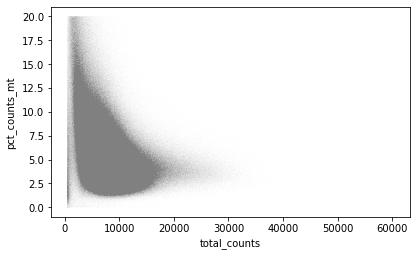

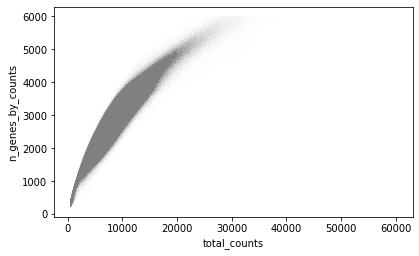

In [5]:
sc.pl.scatter(adata_240, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata_240, x="total_counts", y="n_genes_by_counts")

## Normalisation and scaling

In [6]:
sc.pp.normalize_total(adata_240, target_sum=1e4)
sc.pp.log1p(adata_240)
sc.pp.highly_variable_genes(adata_240, min_mean=0.0125, max_mean=3, min_disp=0.5)

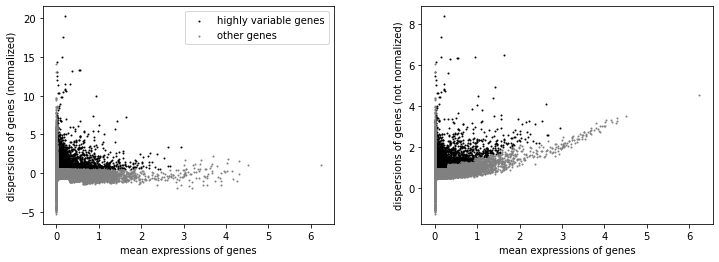

In [7]:
sc.pl.highly_variable_genes(adata_240)

In [8]:
sc.pl.highest_expr_genes(adata_240, n_top=20, )

MemoryError: Unable to allocate 99.6 GiB for an array with shape (13363152346,) and data type int64

In [9]:
adata_240.raw = adata_240
adata_240 = adata_240[:, adata_240.var.highly_variable]
sc.pp.regress_out(adata_240, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(adata_240, max_value=10)

MemoryError: Unable to allocate 99.6 GiB for an array with shape (13363152346,) and data type int64

## Integration
Use Harmony to remove batch effects